In [54]:
#Importing required packages
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import csv
from sklearn.model_selection import train_test_split


In [2]:
#Reading the two datasets
salaries = pd.read_csv("Downloads\salaries.csv",low_memory=False)
loan = pd.read_csv("Downloads\loan.csv",low_memory=False)

In [3]:
#Printing the dimensions of Salaries
print(salaries.shape)

(148654, 13)


In [4]:
salaries

,ID1,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,65022,Delia Manuel,Special Nurse,26648.51,0.00,2871.52,7061.94,29520.03,36581.97,2012,NaN,San Francisco,NaN
1,65023,Kenny Lam,Library Page,22912.59,0.00,312.00,13354.12,23224.59,36578.71,2012,NaN,San Francisco,NaN
2,65024,Joshua Mcfall,Police Officer 2,26098.40,5.55,943.52,9520.16,27047.47,36567.63,2012,NaN,San Francisco,NaN
3,65025,Cynthia Borris,Payroll Clerk,33456.80,276.21,0.00,2831.32,33733.01,36564.33,2012,NaN,San Francisco,NaN
4,65026,Stephen Shaw,Manager V,33862.43,0.00,0.00,2698.58,33862.43,36561.01,2012,NaN,San Francisco,NaN
5,65027,Georgio Zografos,Electrical Transit System Mech,13406.52,1096.12,14664.29,7386.83,29166.93,36553.76,2012,NaN,San Francisco,NaN
6,65028,Bruce Ogden,Asphalt Finisher,18853.00,3004.03,4536.55,10149.53,26393.58,36543.11,2012,NaN,San Francisco,NaN
7,65029,Ricardo Atengco,Special Nurse,25190.70,0.00,4286.19,7034.87,29476.89,36511.76,2012,NaN,San Francisco,NaN
8,65030,Anthony Gulley,Transit Operator,20304.75,6250.32,2131.55,7807.32,28686.62,36493.94,2012,NaN,San Francisco,NaN
9,65031,John Paulo Cunanan,Registered Nurse,25776.30,948.55,2510.84,7255.89,29235.69,36491.58,2012,NaN,San Francisco,NaN


In [5]:
#Printing the Dimensions of Salaries
print(loan.shape)

(246708, 145)


In [6]:
#Identifying the missing data in the salaries dataset
salaries.isnull().sum()

ID1                      0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [7]:
#Dropping NA's and Unnecessary columns
salaries = salaries.drop(["ID1", "Notes", "Status", "Agency"], axis = 1)
salaries = salaries.dropna()

In [8]:
salaries.shape

(111886, 9)

In [9]:
#Identifying the missing data in the loan dataset
loan.isnull().sum()

id                                            246708
member_id                                     246708
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      33645
emp_length                                     21363
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [10]:
total = np.product(loan.shape) # total will be 35772660
miss_values = loan.isnull().sum().sum() # Total missing values are 10027602
per_total = (miss_values/total)*100
print(f"The total percentage of missing values in data set is {(per_total)}")

The total percentage of missing values in data set is 28.031468724998366


In [11]:
print(loan.isnull().any().value_counts(), "\n")

print(f"The columns that have missing values are total {loan.isnull().any().sum()}")

False    83
True     62
dtype: int64 

The columns that have missing values are total 62


In [12]:
total_num = loan.isnull().sum().sort_values(ascending=False)
perc = loan.isnull().sum()/loan.isnull().count() *100
df_miss = pd.concat([total_num, perc], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#Identifying top missing values columns in loan dataset
top_mis = df_miss[df_miss["Percentage %"]>40]
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage %
0,id,246708,100.000000
1,member_id,246708,100.000000
2,desc,246708,100.000000
3,url,246708,100.000000
4,settlement_amount,246695,99.994731
5,settlement_percentage,246695,99.994731
6,settlement_status,246695,99.994731
7,settlement_term,246695,99.994731
8,debt_settlement_flag_date,246695,99.994731
9,settlement_date,246695,99.994731


In [14]:
# Dropping the 42 columns with more than 40% null values
list_to_drop = top_mis['index']
loan_copy = loan
loan_copy = loan_copy.drop(list_to_drop,axis=1)
loan_copy.shape

(246708, 102)

In [15]:
#Identifying null values in the rest 102 columns
print(loan_copy.isnull().any().value_counts(), "\n")
print(f"The columns that have missing values are total {loan_copy.isnull().any().sum()}")

False    83
True     19
dtype: int64 

The columns that have missing values are total 19


In [16]:
total_num = loan_copy.isnull().sum().sort_values(ascending=False)
perc = loan_copy.isnull().sum()/loan_copy.isnull().count() *100
df_miss = pd.concat([total_num, perc], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#Identifying top missing values columns in the rest of the loan dataset
top_mis = df_miss[df_miss["Percentage %"]>0]
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage %
0,il_util,39076,15.838968
1,emp_title,33645,13.637580
2,mths_since_recent_inq,30758,12.467370
3,emp_length,21363,8.659225
4,next_pymnt_d,10620,4.304684
5,mo_sin_old_il_acct,8708,3.529679
6,mths_since_rcnt_il,8708,3.529679
7,num_tl_120dpd_2m,6075,2.462425
8,bc_util,3320,1.345720
9,percent_bc_gt_75,3215,1.303160


In [18]:
top_mis = top_mis.drop([1,3,9,14,16])
list_to_drop = top_mis['index']
loan_copy = loan_copy.drop(list_to_drop,axis=1)
loan_copy.shape

(246708, 88)

In [19]:
#Identifying null values in the rest 89 columns
print(loan_copy.isnull().any().value_counts(), "\n")
print(f"The columns that have missing values are total {loan_copy.isnull().any().sum()}")

False    83
True      5
dtype: int64 

The columns that have missing values are total 5


In [20]:
total_num = loan_copy.isnull().sum().sort_values(ascending=False)
perc = loan_copy.isnull().sum()/loan_copy.isnull().count() *100
df_miss = pd.concat([total_num, perc], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#Identifying top missing values columns in the rest of the loan dataset
top_mis = df_miss[df_miss["Percentage %"]>0]
top_mis.reset_index(inplace=True)
top_mis

,index,Total Missing Values,Percentage %
0,emp_title,33645,13.637580
1,emp_length,21363,8.659225
2,percent_bc_gt_75,3215,1.303160
3,revol_util,278,0.112684
4,avg_cur_bal,25,0.010133


In [22]:
loan_copy1 = loan_copy.dropna()
loan_copy1.shape

(210396, 88)

In [23]:
states = {
        'AK': 'W',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'W',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'M',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'M',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

In [24]:
loan_copy['addr_state'] = loan_copy['addr_state'].astype(str)

In [25]:
temp =[]
for st in loan_copy1['addr_state']:
    for key in states:
        if st == key:
            temp.append(states[key]) 
loan_copy1['region'] = temp

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
loan_copy1['emp_title'] = loan_copy1['emp_title'].astype(str)

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
def ngrams(string, n=3):
    string = string.encode("ascii", errors="ignore").decode() #remove non ascii chars
    string = string.lower() #make lower case
    chars_to_remove = [")","(",".","|","[","]","{","}","'","@","#","%","*"]
    rx = '[' + re.escape(''.join(chars_to_remove)) + ']'
    string = re.sub(rx, '', string) #remove the list of chars defined above
    string = string.replace('&', 'and')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    string = string.title() # normalise case - capital at start of each word
    string = ''.join([i for i in string if not i.isdigit()])
    string = string.strip()
    string = re.sub(' +',' ',string).strip() # get rid of multiple spaces and replace with a single space
    string = re.sub(r'[,-./]|\sBD',r'', string)
    return string

In [28]:
temp =[]
for x in loan_copy1['emp_title']:
    a = ngrams(x)
    temp.append(a)

In [29]:
temp

['Job Coach Supervisor',
 'Quality Field Engineer',
 'Teller',
 'Respritory Therapist',
 'Worship Director',
 'Processor',
 'Neonatal Nurse Practitioner',
 'Stationary Engineer',
 'Exhibits Director',
 'Driver Coordinator',
 'Gas Attendant',
 'Financial Relationship Associate',
 'Sale Representative',
 'Operator',
 'Manager',
 'Nursing Supervisor',
 'Material Handler',
 'Instructional Coordinator',
 'Program Manager',
 'Budget And Procurement Specialist',
 'Foreman Shop',
 'Substance Abuse Counselor',
 'Business Intelligence Engineer',
 'Fc',
 'Banker',
 'Program Support Assistant',
 'Business Analyst',
 'Program Manager',
 'Millwright',
 'Fuel Truck Driver',
 'Publications And Images Project Manager',
 'Trainer',
 'Armed Security Officer',
 'Director',
 'Manager',
 'Agent',
 'Mortgage Loan Processor',
 'Cfo',
 'Laborer',
 'Driver',
 'Lead Transportation Security Officer',
 'General Manager',
 'Vice President',
 'Construction Manager',
 'Administrative Assistant',
 'Transportation Mana

In [30]:
loan_copy1['emp_title_cleaned'] = temp

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
loan_copy1['emp_title_cleaned'] =loan_copy1['emp_title_cleaned'].astype(str)

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
loan_copy1['category'] = loan_copy1['emp_title_cleaned'].str.split().str[-1]

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
loan_copy1 = loan_copy1[['loan_amnt','funded_amnt','int_rate','grade','home_ownership','annual_inc','loan_status','delinq_2yrs','inq_last_6mths','pub_rec','revol_bal','revol_util','total_pymnt','total_rec_late_fee','tot_coll_amt','tot_cur_bal','total_bal_il','max_bal_bc','avg_cur_bal','percent_bc_gt_75','pub_rec_bankruptcies','tot_hi_cred_lim','total_bal_ex_mort','hardship_flag','region','emp_title_cleaned','category']]

In [42]:
cleanup_nums = {"home_ownership": {'MORTGAGE' : 1, 'RENT' : 2, 'OWN' : 3, 'ANY' : 4},
                "loan_status":     {'Current' : 1, 'Fully Paid' : 2, 'Late (31-120 days)' : 3 , 'In Grace Period' : 4,'Late (16-30 days)': 5 , 'Charged Off': 6, 'Default': 0 },
                 "hardship_flag": {'N': 0, 'Y': 1}}
loan_copy1.replace(cleanup_nums, inplace=True)
loan_copy1.head()

,loan_amnt,funded_amnt,int_rate,grade,home_ownership,annual_inc,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,...,max_bal_bc,avg_cur_bal,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,hardship_flag,region,emp_title_cleaned,category
0,11200,11200,8.19,1,1,65000.0,1,0,0,0,...,4603,12482.0,20.0,0,345654,78795,0,W,Job Coach Supervisor,Supervisor
1,6500,6500,17.97,4,1,154000.0,1,2,0,0,...,3943,4324.0,20.0,0,169160,116747,0,S,Quality Field Engineer,Engineer
2,22000,22000,12.98,2,1,65000.0,1,0,0,0,...,3,3191.0,0.0,0,71932,22337,0,S,Teller,Teller
3,3500,3500,16.14,3,1,80000.0,1,0,0,0,...,3873,2298.0,50.0,0,42328,16085,0,M,Respritory Therapist,Therapist
4,7000,7000,12.98,2,1,102500.0,1,0,0,0,...,0,19432.0,0.0,0,214624,76709,0,M,Worship Director,Director


In [44]:
np.percentile(loan_copy1.annual_inc,[0,33.33,66.66,100])

array([      0.,   56000.,   87600., 9757200.])

In [45]:
Low_Earners = loan_copy1[loan_copy1.annual_inc < 56000]

In [46]:
High_Earners = loan_copy1[loan_copy1.annual_inc >= 87600]

In [47]:
Avg_Earners = loan_copy1[loan_copy1.annual_inc >= 56000]

In [48]:
Avg_Earners = Avg_Earners[Avg_Earners.annual_inc < 87600]

In [49]:
Low_W = Low_Earners[Low_Earners.region == 'W']
Low_N =  Low_Earners[Low_Earners.region == 'N']
Low_S = Low_Earners[Low_Earners.region == 'S']
Low_M = Low_Earners[Low_Earners.region == 'M']

In [50]:
High_W = High_Earners[High_Earners.region == 'W']
High_N =  High_Earners[High_Earners.region == 'N']
High_S = High_Earners[High_Earners.region == 'S']
High_M = High_Earners[High_Earners.region == 'M']

In [51]:
AVG_W = Avg_Earners[Avg_Earners.region == 'W']
AVG_N =  Avg_Earners[Avg_Earners.region == 'N']
AVG_S = Avg_Earners[Avg_Earners.region == 'S']
AVG_M = Avg_Earners[Avg_Earners.region == 'M']

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
linear_reg_data =  AVG_W.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      4898
           2       0.93      0.93      0.93       273
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        13

    accuracy                           0.97      5265
   macro avg       0.32      0.32      0.32      5265
weighted avg       0.96      0.97      0.97      5265

[[4876   20    1    1    0    0]
 [  20  253    0    0    0    0]
 [  41    0    0    0    0    0]
 [  29    0    0    0    0    0]
 [  11    0    0    0    0    0]
 [  13    0    0    0    0    0]]
0.9741690408357075


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
linear_reg_data =  AVG_N.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      4731
           2       0.93      0.90      0.91       201
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00        33
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         9

    accuracy                           0.97      5026
   macro avg       0.32      0.32      0.32      5026
weighted avg       0.96      0.97      0.97      5026

[[4717   13    0    1    0    0]
 [  21  180    0    0    0    0]
 [  41    0    0    0    0    0]
 [  32    1    0    0    0    0]
 [  11    0    0    0    0    0]
 [   9    0    0    0    0    0]]
0.97433346597692


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
linear_reg_data =  AVG_M.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      3659
           2       0.91      0.91      0.91       149
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4

    accuracy                           0.98      3862
   macro avg       0.32      0.32      0.32      3862
weighted avg       0.97      0.98      0.97      3862

[[3644   12    0    3    0    0]
 [  14  135    0    0    0    0]
 [  28    0    0    0    0    0]
 [  17    0    0    0    0    0]
 [   5    0    0    0    0    0]
 [   3    1    0    0    0    0]]
0.9785085447954428


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
linear_reg_data =  AVG_S.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      6584
           2       0.95      0.89      0.92       294
           3       0.00      0.00      0.00        63
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         9

    accuracy                           0.98      6984
   macro avg       0.32      0.31      0.32      6984
weighted avg       0.96      0.98      0.97      6984

[[6568   15    0    1    0    0]
 [  32  262    0    0    0    0]
 [  63    0    0    0    0    0]
 [  30    0    0    0    0    0]
 [   4    0    0    0    0    0]
 [   9    0    0    0    0    0]]
0.9779495990836197


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
linear_reg_data =  High_N.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      5047
           2       0.87      0.93      0.90       194
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        12

    accuracy                           0.97      5340
   macro avg       0.31      0.32      0.31      5340
weighted avg       0.96      0.97      0.96      5340

[[5021   26    0    0    0    0]
 [  14  180    0    0    0    0]
 [  49    0    0    0    0    0]
 [  25    1    0    0    0    0]
 [  11    1    0    0    0    0]
 [  12    0    0    0    0    0]]
0.9739700374531836


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [100]:
linear_reg_data =  High_W.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      5366
           2       0.93      0.91      0.92       294
           3       0.00      0.00      0.00        55
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        13

    accuracy                           0.97      5766
   macro avg       0.32      0.32      0.32      5766
weighted avg       0.96      0.97      0.96      5766

[[5342   20    4    0    0    0]
 [  26  268    0    0    0    0]
 [  55    0    0    0    0    0]
 [  25    1    0    0    0    0]
 [  12    0    0    0    0    0]
 [  13    0    0    0    0    0]]
0.9729448491155047


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Feature: 0, Score: 0.00007
Feature: 1, Score: 0.00007
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00003
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00001
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.00034
Feature: 12, Score: -0.00000
Feature: 13, Score: 0.00001
Feature: 14, Score: -0.00000
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00002
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: 0.00000


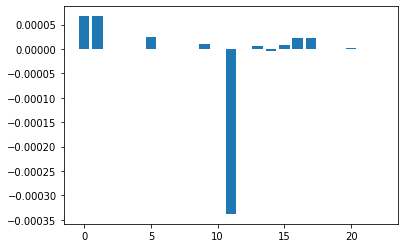

In [81]:
from matplotlib import pyplot
importance = logmodel.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [102]:
linear_reg_data =  High_M.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      3119
           2       0.96      0.93      0.94       120
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5

    accuracy                           0.98      3280
   macro avg       0.32      0.32      0.32      3280
weighted avg       0.97      0.98      0.98      3280

[[3113    5    1    0    0    0]
 [   9  111    0    0    0    0]
 [  16    0    0    0    0    0]
 [  15    0    0    0    0    0]
 [   5    0    0    0    0    0]
 [   5    0    0    0    0    0]]
0.9829268292682927


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
linear_reg_data =  High_S.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      6264
           2       0.91      0.95      0.93       292
           3       0.00      0.00      0.00        49
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        13

    accuracy                           0.98      6661
   macro avg       0.32      0.32      0.32      6661
weighted avg       0.96      0.98      0.97      6661

[[6237   27    0    0    0    0]
 [  16  276    0    0    0    0]
 [  49    0    0    0    0    0]
 [  30    0    0    0    0    0]
 [  13    0    0    0    0    0]
 [  13    0    0    0    0    0]]
0.9777811139468549


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
linear_reg_data =  Low_N.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      4265
           2       0.90      0.91      0.91       144
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         9

    accuracy                           0.98      4485
   macro avg       0.31      0.32      0.32      4485
weighted avg       0.96      0.98      0.97      4485

[[4254   10    0    0    1    0]
 [  13  131    0    0    0    0]
 [  32    1    0    0    0    0]
 [  25    2    0    0    0    0]
 [   7    0    0    0    0    0]
 [   8    1    0    0    0    0]]
0.9777034559643255


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
linear_reg_data =  Low_M.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      3893
           2       0.92      0.93      0.92       171
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        10

    accuracy                           0.98      4127
   macro avg       0.32      0.32      0.32      4127
weighted avg       0.96      0.98      0.97      4127

[[3876   14    0    2    0    1]
 [  12  159    0    0    0    0]
 [  30    0    0    0    0    0]
 [  15    0    0    0    0    0]
 [   8    0    0    0    0    0]
 [  10    0    0    0    0    0]]
0.9777077780470075


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [106]:
linear_reg_data =  Low_W.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      4894
           2       0.94      0.84      0.89       194
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        12

    accuracy                           0.98      5172
   macro avg       0.32      0.31      0.31      5172
weighted avg       0.96      0.98      0.97      5172

[[4884    9    1    0    0    0]
 [  31  163    0    0    0    0]
 [  43    0    0    0    0    0]
 [  20    1    0    0    0    0]
 [   8    0    0    0    0    0]
 [  12    0    0    0    0    0]]
0.975831399845321


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
linear_reg_data =  Low_S.drop(['region','emp_title_cleaned','category'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(linear_reg_data.drop('loan_status',axis=1),linear_reg_data['loan_status'], test_size=0.30,random_state=101)
logmodel = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      6746
           2       0.94      0.86      0.90       288
           3       0.00      0.00      0.00        63
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        14

    accuracy                           0.98      7155
   macro avg       0.32      0.31      0.31      7155
weighted avg       0.96      0.98      0.97      7155

[[6731   14    0    0    0    1]
 [  40  248    0    0    0    0]
 [  62    1    0    0    0    0]
 [  35    1    0    0    0    0]
 [   8    0    0    0    0    0]
 [  14    0    0    0    0    0]]
0.9754018169112508


C:\Users\krish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\krish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
len(High_M.category.unique())

1018

In [111]:
len(AVG_M.category.unique())

1219

In [112]:
salaries

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,Delia Manuel,Special Nurse,26648.51,0.00,2871.52,7061.94,29520.03,36581.97,2012
1,Kenny Lam,Library Page,22912.59,0.00,312.00,13354.12,23224.59,36578.71,2012
2,Joshua Mcfall,Police Officer 2,26098.40,5.55,943.52,9520.16,27047.47,36567.63,2012
3,Cynthia Borris,Payroll Clerk,33456.80,276.21,0.00,2831.32,33733.01,36564.33,2012
4,Stephen Shaw,Manager V,33862.43,0.00,0.00,2698.58,33862.43,36561.01,2012
5,Georgio Zografos,Electrical Transit System Mech,13406.52,1096.12,14664.29,7386.83,29166.93,36553.76,2012
6,Bruce Ogden,Asphalt Finisher,18853.00,3004.03,4536.55,10149.53,26393.58,36543.11,2012
7,Ricardo Atengco,Special Nurse,25190.70,0.00,4286.19,7034.87,29476.89,36511.76,2012
8,Anthony Gulley,Transit Operator,20304.75,6250.32,2131.55,7807.32,28686.62,36493.94,2012
9,John Paulo Cunanan,Registered Nurse,25776.30,948.55,2510.84,7255.89,29235.69,36491.58,2012
